The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

## IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load and read the dataset

In [2]:
data = pd.read_csv('spam.csv', encoding = 'latin-1')

In [3]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


## Exploratory Data Analysis

In [5]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Drop the columns, 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' as these are having lots of missing values.

In [8]:
data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True, axis = 1)
data.columns = ['category', 'text']
data.head(10)

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [9]:
data.describe()

,category,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
data.groupby(['category']).describe()

text                                                               
         count unique                                                top freq
category                                                                     
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

Let's find the number of spam messages and ham messages in the dataset using visualization.

ham     4825
spam     747
Name: category, dtype: int64


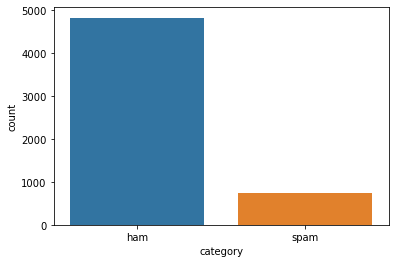

In [13]:
print(data.category.value_counts())
sns.countplot(data.category)

From above countplot, 747 spam messages and 4825 ham messages are found out of 5572 messages.

In [14]:
data['text_length'] = data['text'].apply(len)
data.head(10)

,category,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


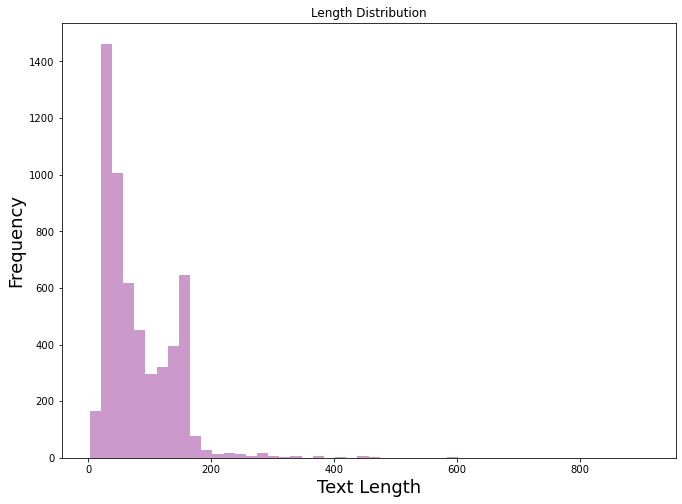

In [16]:
plt.figure(figsize = (11, 8))
ax = plt.axes()
sns.distplot(data['text_length'], ax = ax, kde = False, color = "purple")
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Text Length', fontsize = 18)
plt.title('Length Distribution')
plt.show()

Let's focus on the idea of trying to see if message length is a distinguishing feature between ham and spam.

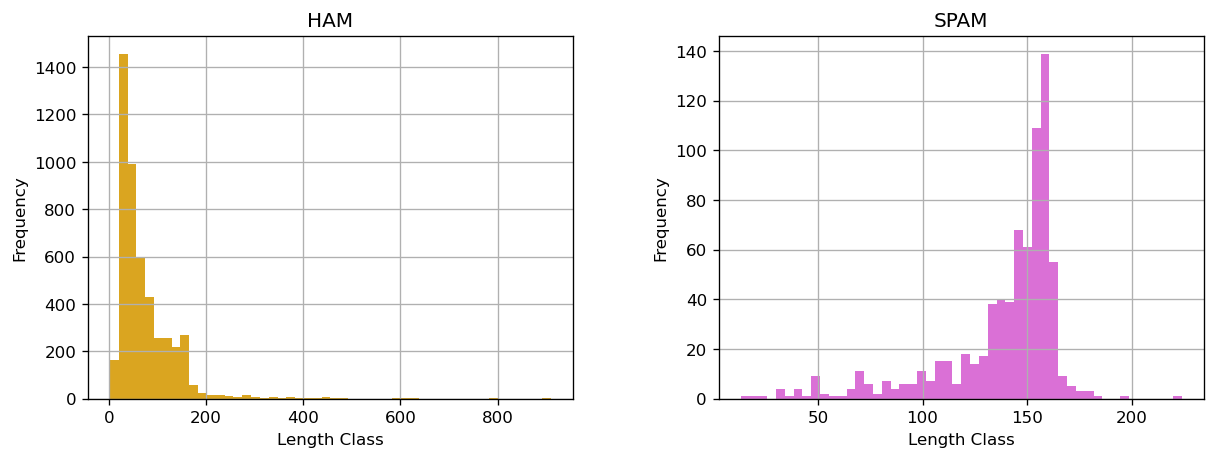

In [22]:
fig,ax = plt.subplots(1, 2, figsize = (12, 4), dpi = 120)

data[data['category'] == 'ham'].hist(column='text_length', bins=50, ax = ax[0], color = 'goldenrod')
ax[0].set(xlabel = 'Length Class', ylabel = 'Frequency', title = 'HAM')
data[data['category'] == 'spam'].hist(column='text_length', bins=50, ax = ax[1], color = 'orchid')
ax[1].set(xlabel = 'Length Class', ylabel = 'Frequency', title = 'SPAM')

plt.show()

From above, we've been able to discover a trend that spam messages tend to have more characters than ham messages.

## Preprocessing

In [23]:
data.category.replace({'ham' : 0, 'spam' : 1}, inplace = True)
data.sample(10)

,category,text,text_length
209,0,Both :) i shoot big loads so get ready!,39
3355,0,Ok not a problem will get them a taxi. C ing ...,115
4269,0,Great. Hope you are using your connections fro...,122
3853,0,oh ya... Got hip hop open. Haha i was thinking...,148
759,0,"Call me when you/carlos is/are here, my phone'...",95
1844,0,Da is good good player.why he is unsold.,40
3931,0,Sos! Any amount i can get pls.,30
2656,0,Feel like trying kadeem again? :V,33
4274,0,Haiyoh... Maybe your hamster was jealous of mi...,51
3142,0,Boy; I love u Grl: Hogolo Boy: gold chain kods...,156


In [24]:
data['text'].sample(15)

2627    I know I'm lacking on most of this particular ...
3586    Our ride equally uneventful - not too many of ...
4872                          Lol! Oops sorry! Have fun. 
4949    Hi its me you are probably having too much fun...
5175    Raji..pls do me a favour. Pls convey my Birthd...
5430    If you can make it any time tonight or wheneve...
3469                          aathi..where are you dear..
4851                               I liked your new house
1825    Wat makes some people dearer is not just de ha...
2970    Height of Confidence: All the Aeronautics prof...
3936    Yeah, in fact he just asked if we needed anyth...
2203    soon you will have the real thing princess! Do...
1008    Poyyarikatur,kolathupalayam,unjalur post,erode...
2441    Back in brum! Thanks for putting us up and kee...
2384                               Sorry, I'll call later
Name: text, dtype: object

### NLP - Natural Language Processing

NLP uses nltk library to format the text.

In [25]:
import re
import string
import unicodedata
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')

In [26]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', " ", text)
    
    words = ""
    for i in text.split():
            stemmer = SnowballStemmer("english")
            words += stemmer.stem(i) + " "
    return words

In [27]:
data['clean_text'] = data['text'].apply(clean_text)

In [28]:
data['clean_text'].sample(15)

5453                 except there a chick with huge boob 
2658                             not yet chikkuwat abt u 
2527    mmmmm i love wake to your word this morn i mis...
3974    do u think that ani girl will propos u today b...
2937    hey ive book the pilat and yoga lesson alreadi...
4219    u free on sat rite u wan 2 watch infern affair...
2166                thank you and by the way i just lost 
4583    noooooooo pleas last thing i need is stress fo...
5102    this msg is for your mobil content order it ha...
4819    check out choos your babe video smsshsexnetun ...
738                             wish i were with you now 
4959                     i want ltgt rs dado you have it 
2168                 thx all will be well in a few month 
4056                         noic text me when your here 
1594    never blame a day in ur life good day give u h...
Name: clean_text, dtype: object

In [29]:
data.sample(10)

,category,text,text_length,clean_text
3931,0,Sos! Any amount i can get pls.,30,sos ani amount i can get pls
3930,0,Nooooooo I'm gonna be bored to death all day. ...,72,nooooooo im gonna be bore to death all day cab...
323,0,That would be great. We'll be at the Guild. Co...,157,that would be great well be at the guild could...
560,0,Hi msg me:)i'm in office..,26,hi msg meim in offic
1770,0,Dont show yourself. How far. Put new pictures ...,61,dont show yourself how far put new pictur up o...
675,0,"I dont knw pa, i just drink milk..",34,i dont knw pa i just drink milk
678,0,Cause I'm not freaky lol,24,caus im not freaki lol
4803,0,"Er, hello, things didnÛ÷t quite go to plan Û...",114,er hello thing didnû÷t quit go to plan ûò is...
3697,0,S:)but he had some luck.2 catches put down:),44,sbut he had some luck2 catch put down
4387,0,"see you then, we're all christmassy here!",41,see you then were all christmassi here


## Splitting of data into train and test data

In [30]:
X = data['clean_text'].copy()
y = data['category'].copy()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 111)

In [33]:
X_train.shape

(3900,)

In [35]:
X_test.shape

(1672,)

In [37]:
y_train.shape

(3900,)

In [38]:
y_test.shape

(1672,)

## Model Building

**MultinomialNB**

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer

pipe_MNB = Pipeline([('bow'  , CountVectorizer()),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_MNB' , MultinomialNB(alpha = 0.2))])

In [61]:
pipe_MNB.fit(X = sms_train, y = label_train)
pred_test_MNB = pipe_MNB.predict(sms_test)
acc_MNB = accuracy_score(label_test, pred_test_MNB)

print("MultinomialNB accuracy: ", acc_MNB)
print("MultinomialNB score: ", pipe_MNB.score(sms_test, label_test))

MultinomialNB accuracy:  0.9814593301435407
MultinomialNB score:  0.9814593301435407


In [62]:
pipe_MNB_tfidfvec = Pipeline([ ('tfidf_vec' , TfidfVectorizer()),
                               ('clf_MNB'   , MultinomialNB(alpha = 0.2))])

In [63]:
pipe_MNB_tfidfvec.fit(X=sms_train, y=label_train)
pred_test_MNB_tfidfvec = pipe_MNB_tfidfvec.predict(sms_test)
acc_MNB_tfidfvec = accuracy_score(label_test, pred_test_MNB_tfidfvec)

print("MultinomialNB accuracy: ", acc_MNB_tfidfvec)
print("MultinomialNB score: ", pipe_MNB_tfidfvec.score(sms_test, label_test))

MultinomialNB accuracy:  0.9814593301435407
MultinomialNB score:  0.9814593301435407


Results obtianed from CountVectorizer and TfidfVectorizer are same.

**KNN**

In [58]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV

pipe_KNN = Pipeline([('bow'  , CountVectorizer()),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_KNN' , KNeighborsClassifier())])

parameters_KNN = {'clf_KNN__n_neighbors': (8, 15, 20), }

grid_KNN = GridSearchCV(pipe_KNN, parameters_KNN, cv = 5, n_jobs = -1, verbose = 1)
grid_KNN.fit(X = sms_train, y = label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   22.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bow', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf_KNN', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'clf_KNN__n_neighbors': (8, 15, 20)},
             verbose=1)

In [70]:
grid_KNN.best_score_

0.9528205128205128

In [67]:
pred_test_grid_KNN = grid_KNN.predict(sms_test)
acc_KNN = accuracy_score(label_test, pred_test_grid_KNN)

print("KNN accuracy: ", acc_KNN)
print("KNN score: ", grid_KNN.score(sms_test, label_test))

KNN accuracy:  0.9617224880382775
KNN score:  0.9617224880382775


**SVC**

In [71]:
pipe_SVC = Pipeline([('bow'  , CountVectorizer()),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_SVC' , SVC(kernel = 'sigmoid', gamma = 1.0, C = 1000))])

parameters_SVC = dict(tfidf = [None, TfidfTransformer()], clf_SVC__C = [500, 1000, 1500])

grid_SVC = GridSearchCV(pipe_SVC, parameters_SVC, cv = 5, n_jobs = -1, verbose = 1)

grid_SVC.fit(X = sms_train, y = label_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('bow', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf_SVC',
                                        SVC(C=1000, gamma=1.0,
                                            kernel='sigmoid'))]),
             n_jobs=-1,
             param_grid={'clf_SVC__C': [500, 1000, 1500],
                         'tfidf': [None, TfidfTransformer()]},
             verbose=1)

In [72]:
grid_SVC.best_score_

0.9576923076923076

In [73]:
pred_test_grid_SVC = grid_SVC.predict(sms_test)
acc_SVC = accuracy_score(label_test, pred_test_grid_SVC)

print("SVC accuracy: ", acc_SVC)
print("SVC score: ", grid_SVC.score(sms_test, label_test))

SVC accuracy:  0.9599282296650717
SVC score:  0.9599282296650717


## Comparison of results

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [82]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot = True, fmt = 'd', linewidths = .5,  cmap = "Blues", square = True, cbar = False)
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [83]:
list_clf = ["MNB", "KNN", "SVC"]

list_pred = [pred_test_MNB, pred_test_grid_KNN, pred_test_grid_SVC]

dict_pred = dict(zip(list_clf, list_pred))

In [84]:
def plot_all_confusion_matrices(y_true, dict_all_pred, str_title):
    
    list_classifiers = list(dict_all_pred.keys())
    plt.figure(figsize = (10, 7.5))
    plt.suptitle(str_title, fontsize = 20, fontweight = 'bold')
    n = 231
    
    for clf in list_classifiers : 
        plt.subplot(n)
        plot_confusion_matrix(y_true, dict_all_pred[clf])
        plt.title(clf, fontweight = 'bold')
        n += 1

    plt.tight_layout()
    plt.subplots_adjust(top = 0.9)

**Confusion Matrix**

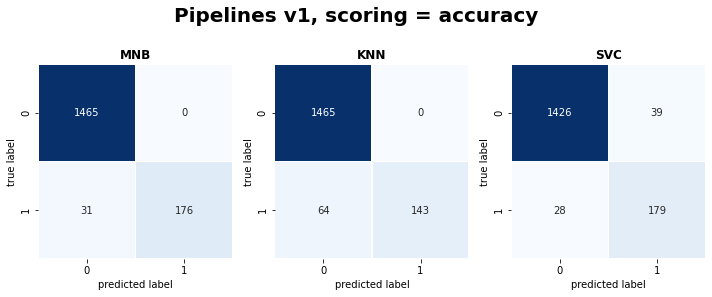

In [85]:
plot_all_confusion_matrices(label_test, dict_pred, "Pipelines, scoring = accuracy")

**Precision_score**

In [86]:
dict_acc = {}
for clf in list_clf :
    dict_acc[clf] = accuracy_score(label_test, dict_pred[clf])

In [87]:
for clf in list_clf :
    print(clf, " " , dict_acc[clf])

MNB   0.9814593301435407
KNN   0.9617224880382775
SVC   0.9599282296650717


MNB has high accuracy compared to other two.

In [88]:
for clf in list_clf :
    print(clf, " ", precision_score(label_test, dict_pred[clf]))

MNB   1.0
KNN   1.0
SVC   0.8211009174311926


Precision of MNB and KNN is 1.0